In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:\my files\Scraped Data\winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
df.shape

(1599, 12)

In [59]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:>

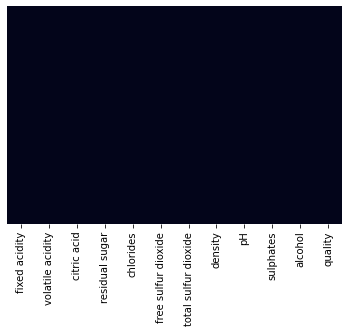

In [61]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)


In [79]:
df["quality"].unique()

array([2, 3, 4, 1, 5, 0], dtype=int8)

In [64]:
df["quality"]=df["quality"].astype("category")
df["quality"]=df["quality"].cat.codes
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


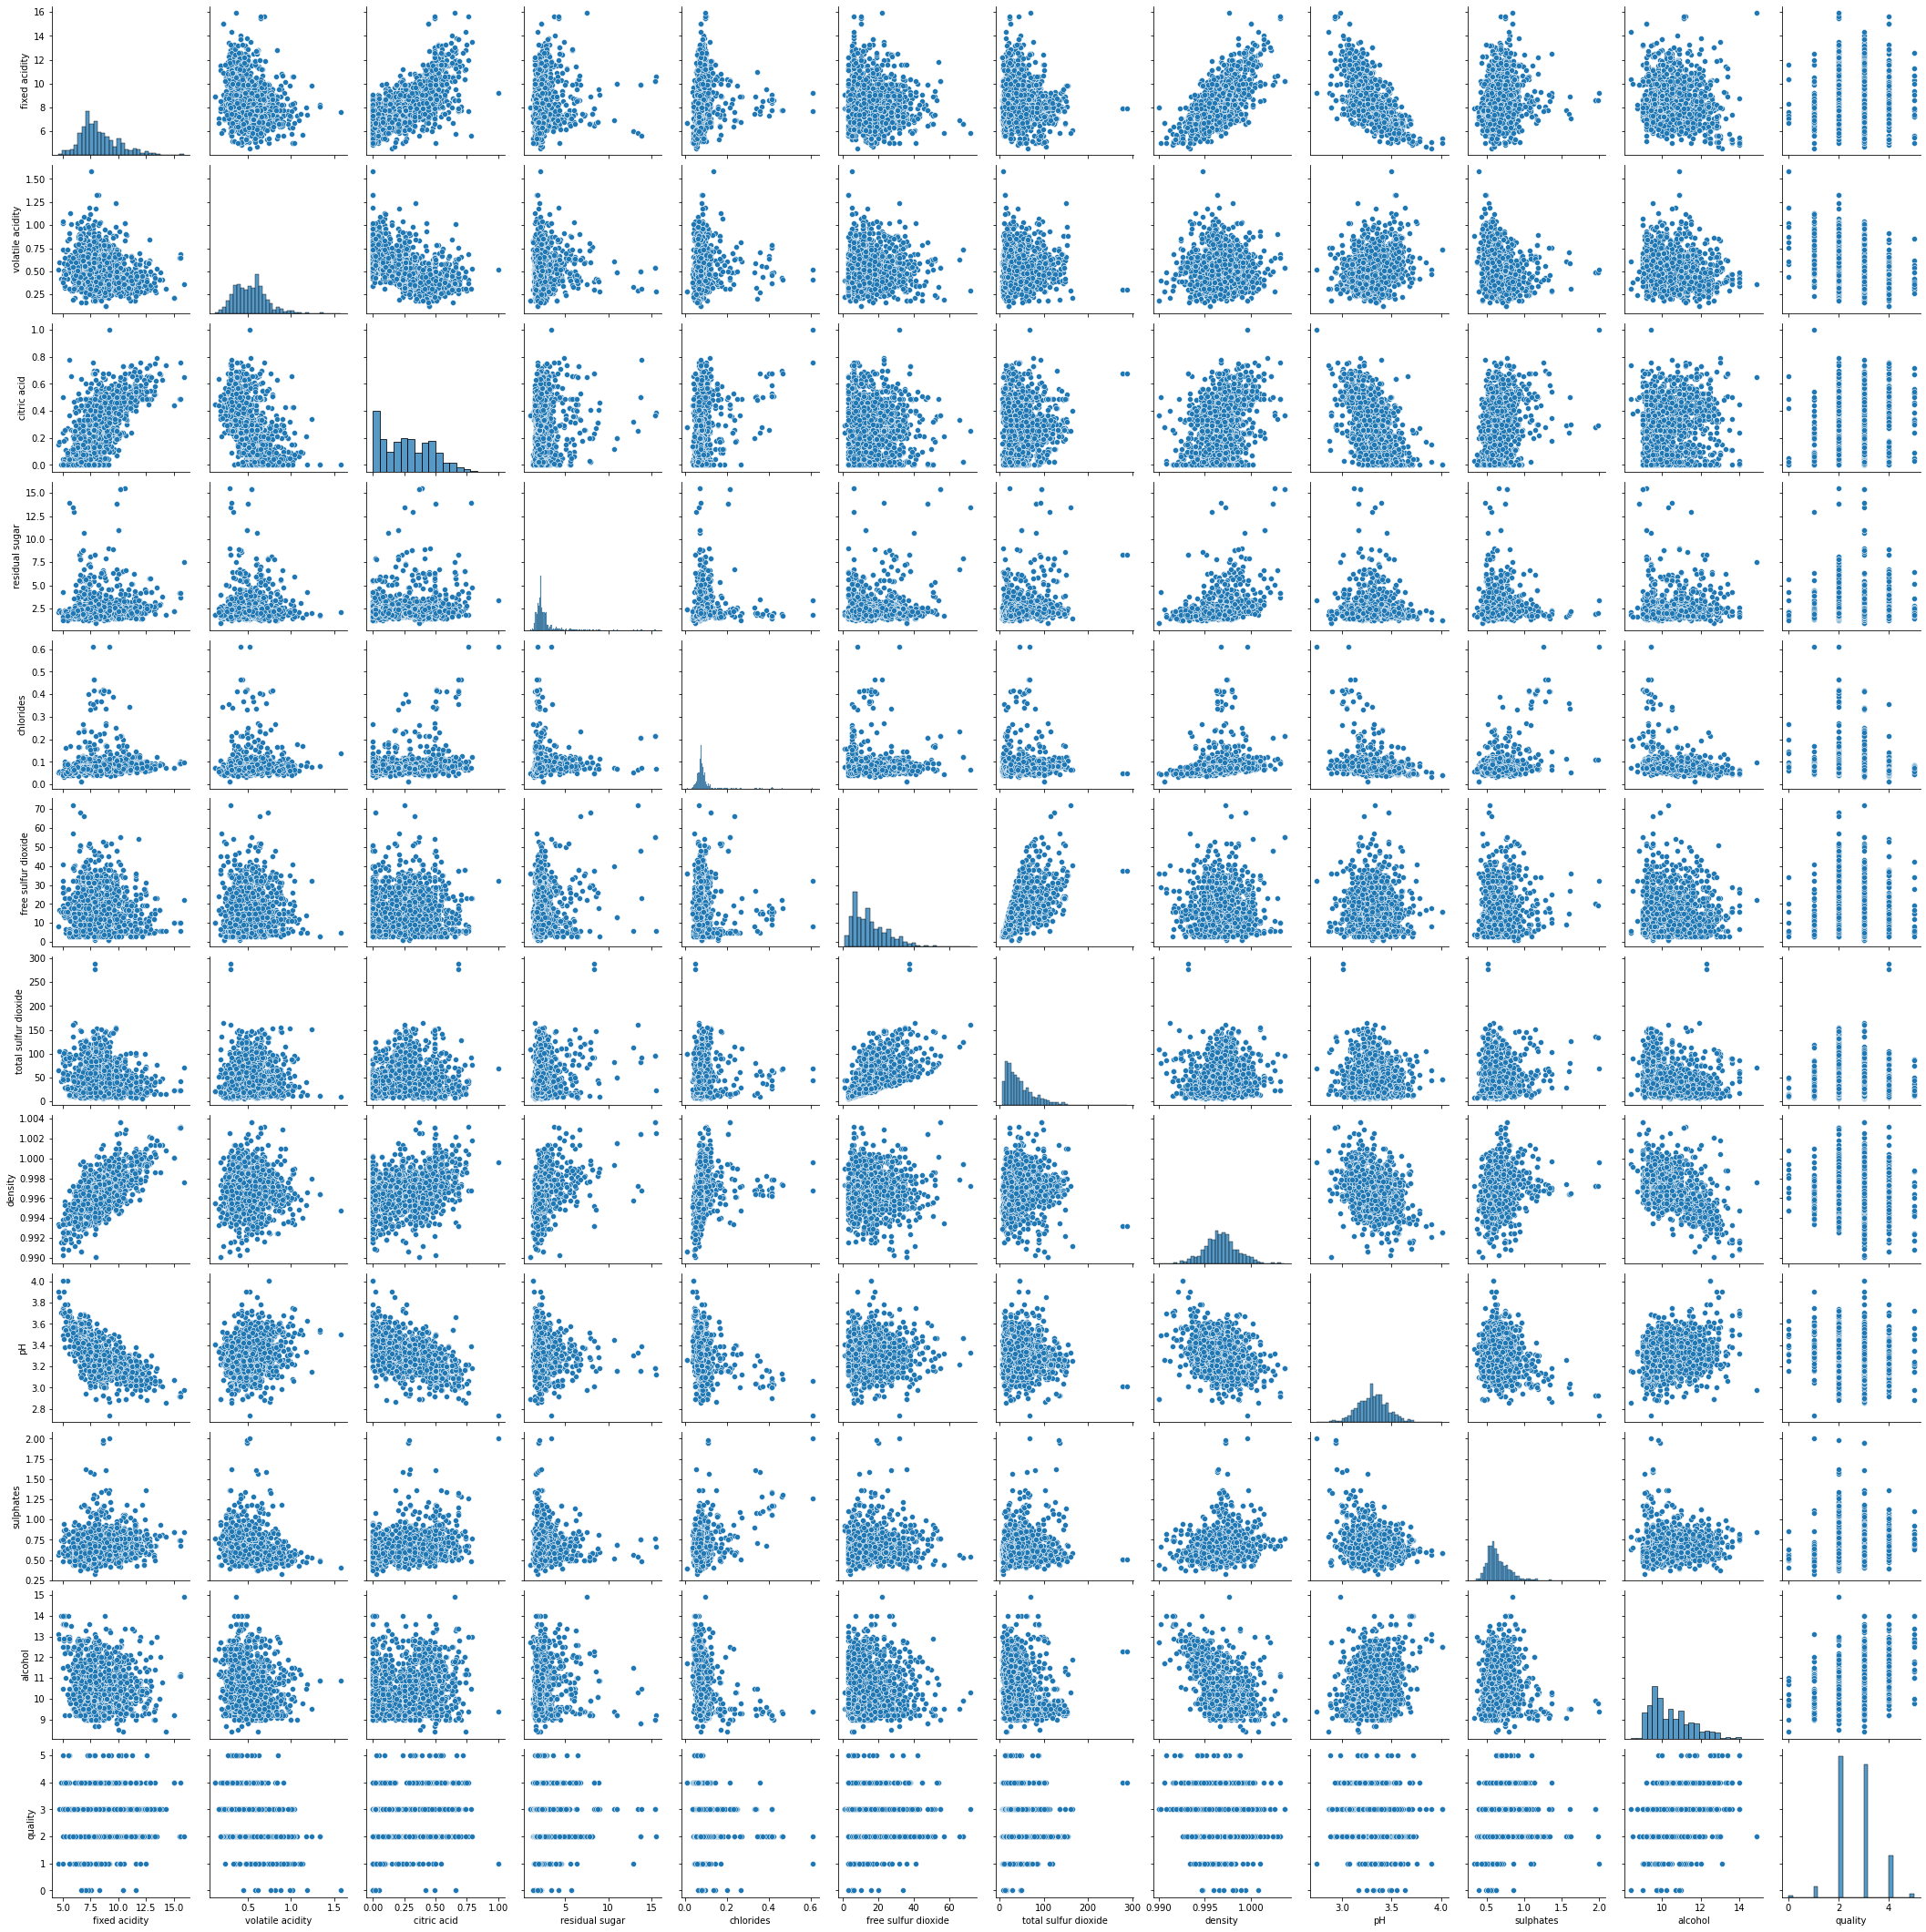

In [65]:
sns.pairplot(df)

<AxesSubplot:>

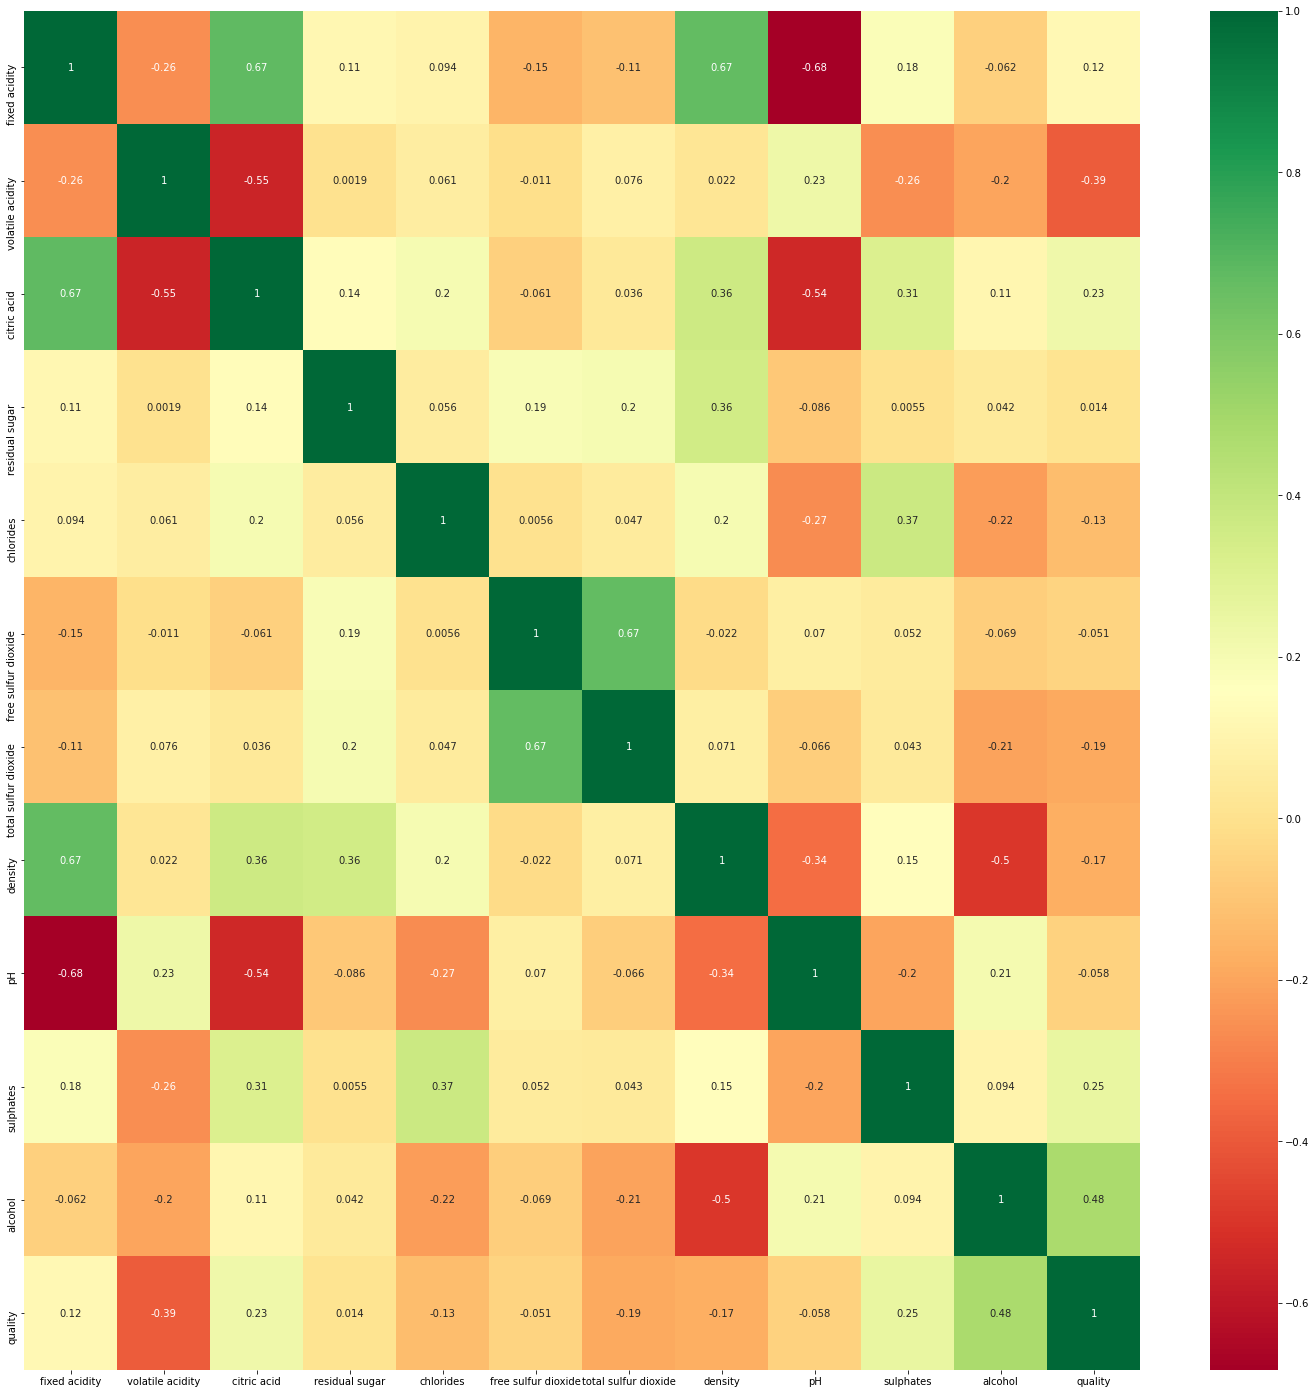

In [66]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [70]:
df.head()

,fixed acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [72]:
X = df.iloc[:,:-1]
y = df["quality"]
X.shape

(1599, 10)

In [73]:
y.shape

(1599,)

In [74]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
outlier = lof.fit_predict(X)
outlier[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape


(1279, 10)

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf_model = rf.fit(X_train,y_train)
pred = rf.predict(X_test)
pred


array([3, 2, 4, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 4, 4, 2, 2, 3, 3, 2,
       3, 3, 2, 2, 2, 4, 2, 3, 2, 3, 3, 2, 4, 4, 2, 3, 3, 3, 2, 3, 3, 4,
       3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 4, 2, 2, 2, 3, 3, 2, 3,
       2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2, 2, 2, 4, 3, 2, 3, 2, 3, 3, 3, 2,
       2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 4, 3, 3, 3, 2, 2, 2, 2, 3, 2,
       3, 2, 5, 2, 3, 3, 2, 4, 4, 3, 2, 3, 2, 2, 3, 4, 2, 2, 3, 3, 2, 2,
       3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 5, 3, 2, 2, 3, 2, 2, 2,
       3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 4, 2, 3,
       3, 4, 4, 2, 2, 4, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 4, 2, 3, 2, 3, 3, 2,
       2, 3, 4, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 4, 4, 3, 2, 3,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 4, 3, 3, 2, 3,
       2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 2, 4, 2, 3, 3, 2,
       2, 2, 4, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3,

In [77]:
from sklearn.metrics import confusion_matrix,accuracy_score
c_mat = confusion_matrix(y_test,pred)
c_mat

array([[  0,   0,   0,   2,   0,   0],
       [  0,   0,   6,   5,   0,   0],
       [  0,   0, 115,  18,   2,   0],
       [  0,   0,  29, 104,   9,   0],
       [  0,   0,   1,  10,  14,   2],
       [  0,   0,   0,   1,   2,   0]], dtype=int64)

In [78]:
accuracy_score(y_test,pred)

0.728125

In [84]:
from sklearn.model_selection import GridSearchCV
params_grid = [{"n_estimators":[3,10,30,60,80,100],"max_features":[2,3,4,5,6,7,8,9,10]},
             {"n_estimators":[3,30,60],"max_features":[2,4,6,8,10]}]
grid_search = GridSearchCV(rf,
                           params_grid,
                           scoring="accuracy",
                           cv=10,
                           n_jobs=1
                          )
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid=[{'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'n_estimators': [3, 10, 30, 60, 80, 100]},
                         {'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 30, 60]}],
             scoring='accuracy')

In [86]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 100}

In [87]:
rf = RandomForestClassifier(n_estimators=100,max_features=2)
rf_model = rf.fit(X_train,y_train)
pred2 = rf.predict(X_test)
pred2

array([3, 2, 4, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 4, 2, 2, 2, 3, 2,
       3, 3, 2, 2, 2, 4, 2, 3, 3, 3, 3, 3, 4, 4, 2, 3, 3, 3, 2, 3, 3, 4,
       3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 4, 2, 2, 3, 3, 3, 2, 3,
       2, 2, 4, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 4, 3, 2, 3, 3, 3, 2, 3, 2,
       2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 4, 3, 3, 3, 2, 2, 2, 2, 3, 2,
       3, 2, 5, 2, 3, 3, 2, 4, 3, 3, 2, 3, 2, 2, 3, 4, 2, 2, 3, 3, 2, 2,
       3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 5, 3, 2, 2, 3, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 4, 3, 3,
       2, 4, 4, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2,
       3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 4, 2, 3, 3, 3, 3, 2,
       2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 4, 3, 3, 4, 4, 3, 2, 3,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 4, 3, 3, 2, 3,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 3, 3, 3, 3, 4, 2, 4, 2, 3, 3, 2,
       2, 2, 4, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3,

In [88]:
from sklearn.metrics import confusion_matrix,accuracy_score
c_mat = confusion_matrix(y_test,pred2)
c_mat

array([[  0,   0,   0,   2,   0,   0],
       [  0,   0,   8,   3,   0,   0],
       [  0,   0, 111,  22,   2,   0],
       [  0,   0,  27, 109,   6,   0],
       [  0,   0,   0,  11,  14,   2],
       [  0,   0,   0,   1,   2,   0]], dtype=int64)

In [89]:
accuracy_score(y_test,pred2)

0.73125